In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Comment out the next line if it doesn't run
%matplotlib widget 

In [2]:
class PhotonPacket:
    def __init__(
        self, 
        N=1, # number of packets
        position = (0, 0, 0), # initial positions
        boxsize = (10, 10, 10) 
    ):

        self.position = [np.array([[position[0]], [position[1]], [position[2]]]) for _ in range(N)]
        self.N = N
        self.boxsize = boxsize
        
    def optical_depth(self):

        return -np.log(np.random.random())
    
    def phi(self):
        
        return 2*np.pi*np.random.random()
    
    def theta(self):

        return np.arccos(2 * np.random.random() - 1)

    def inBox(self, pos):

        return (0 <= pos[0] <= self.boxsize[0]) and (0 <= pos[1] <= self.boxsize[1]) and (0 <= pos[2] <= self.boxsize[2])
    
    def move(self):

        for i in range(self.N): 
            while self.inBox(self.position[i][:, -1]):

                r = self.optical_depth()
                theta = self.theta()
                phi = self.phi()
                
                self.position[i] = np.append(self.position[i], [[self.position[i][0,-1] + r * np.sin(theta) * np.cos(phi)], 
                 [self.position[i][1,-1] + r * np.sin(theta) * np.sin(phi)], 
                 [self.position[i][2,-1] + r * np.cos(theta)]], 
                 axis=1)
            
            self.position[i] = self.position[i][:, :-1] # remove last position outside box


In [3]:
N = 10
boxsize = (10, 10, 10)
x, y, z = boxsize[0]/2, boxsize[1]/2, boxsize[2]
initial = (x, y, z)

In [4]:
Photon = PhotonPacket(N=N, position=initial, boxsize=boxsize)
Photon.move()

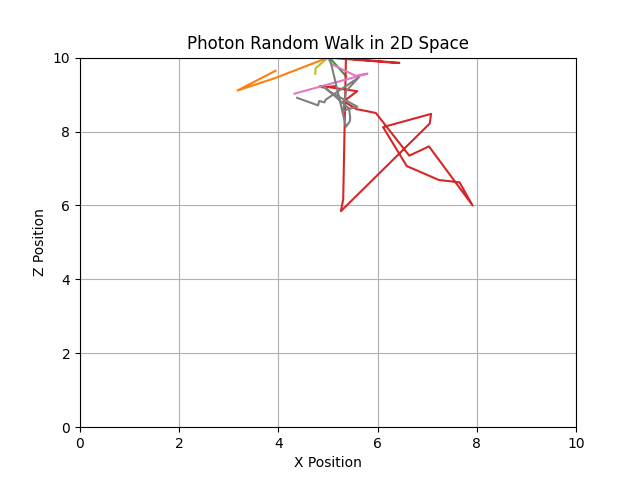

In [5]:
plt.figure()
for i in range(N):
    plt.plot(Photon.position[i][0, :], Photon.position[i][2,:])
plt.xlim(0, boxsize[0])
plt.ylim(0, boxsize[2])
plt.xlabel('X Position')
plt.ylabel('Z Position')
plt.title('Photon Random Walk in 2D Space')
plt.grid()
plt.show()

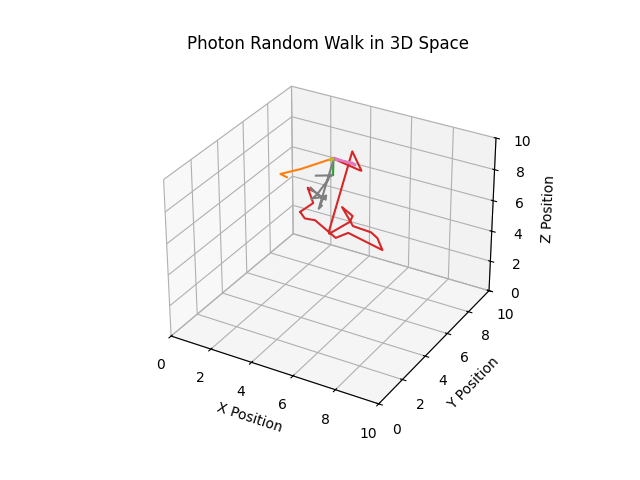

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(N):
    ax.plot(Photon.position[i][0, :], Photon.position[i][1, :], Photon.position[i][2, :])

ax.set_xlim(0, boxsize[0])
ax.set_ylim(0, boxsize[1])
ax.set_zlim(0, boxsize[2])
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Photon Random Walk in 3D Space')
plt.show()